In [1]:
#cell-width control
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Imports

In [3]:
#packages
import numpy
import tensorflow as tf
from tensorflow.core.example import example_pb2

#utils
import os
import random
import pickle
import struct
import time
#from generators import *

#keras
import keras
from keras.preprocessing import text, sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Model, Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Concatenate, Dot, Embedding, LSTM, Conv1D, MaxPooling1D, Input, Lambda
    #callbacks
from keras.callbacks import TensorBoard, ModelCheckpoint, Callback


Using TensorFlow backend.


In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels

In [5]:
data = numpy.loadtxt('run_.-tag-seq2seq_loss_loss.csv', skiprows=1, delimiter=',')

In [6]:
data[0]

array([1.50231425e+09, 4.30000000e+01, 8.97298336e+00])

[2.28454000e+05 1.84231174e+00]


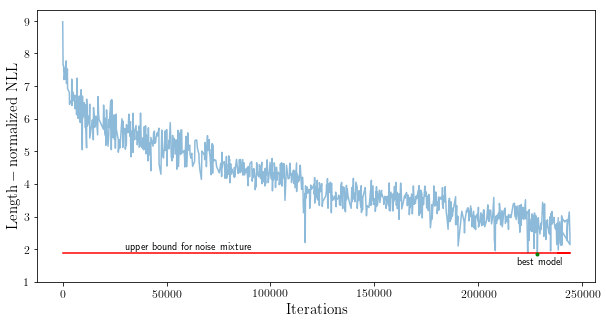

In [16]:
plt.figure(figsize=(10,5))
plt.plot(data[:,1], data[:,2], alpha=0.5)
plt.ylim(ymin=1)
plt.ylabel(r'$\mathrm{Length-normalized~NLL}$',fontsize=15)
plt.xlabel(r'$\mathrm{Iterations}$',fontsize=15)
min_point = data[numpy.argmin(data[:,2])][1:]
print(min_point)
bound = 1.888363442
plt.plot(data[:,1], [bound]*data.shape[0], color='red')
plt.plot(min_point[0], min_point[1], marker='o', color='green', markersize=3)
plt.annotate('best model', xy=min_point, xytext=min_point+(-10000,-0.3)) 
            #arrowprops=dict(facecolor='black', shrink=0.001))
plt.annotate('upper bound for noise mixture', xy=(30000,bound), xytext=(30000,bound+0.1))
plt.savefig('see-nll-new.png', transparent=True,bbox_inches='tight', dpi=600)
plt.show()

In [9]:
print(min(data[:,2]))

1.8423117399215698


In [ ]:
1.888363442

In [4]:
data[numpy.argmin(data[:,2])][1:]

array([2.28454000e+05, 1.84231174e+00])